## Simple Circuit Speed Up

In [1]:
import os
import numpy as np
from time import time
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qgear.toolbox.Util_CudaQ import qiskit_to_gateList
from qgear.toolbox.Util_H5io4 import write4_data_hdf5, read4_data_hdf5
from qgear.runner import run_cudaq
# ----------------------------
# 1. Create a simple Qiskit circuit
n_qubits = 29
qc = QuantumCircuit(n_qubits)
qc.h(0)
qc.cx(0, 1)
qc.ry(np.pi/4, 2)
qc.measure_all()

qcEL = [qc]  # List of circuits
numShots = 10000
verb = 0
# backend_cudaq = "qpp-cpu"  # safer default for CPU-only systems
backend_cudaq="nvidia"
# ----------------------------
# 2. Run with CUDA-Q
out_path = "out"
os.makedirs(out_path, exist_ok=True)
circ_name = "toy_example"

# Convert to gate list
outD, md = qiskit_to_gateList(qcEL)
inpF = os.path.join(out_path, circ_name + ".gate_list.h5")
md["short_name"] = circ_name
write4_data_hdf5(outD, inpF, md)

# Load back
gateD, MD = read4_data_hdf5(inpF, verb)
print(gateD)
# Time CUDA-Q execution
T0 = time()
resL_cudaq = run_cudaq(gateD, numShots, verb=verb, backend=backend_cudaq)
ela_cudaq = time() - T0

# ----------------------------
# 3. Run with Qiskit AerSimulator
aer_backend = AerSimulator()

# Transpile for Aer
qcT = transpile(qc, aer_backend)

T1 = time()
job = aer_backend.run(qcT, shots=numShots)
res_aer = job.result().get_counts()
ela_aer = time() - T1

# ----------------------------
# 4. Print results
print("=== CUDA-Q Results ===")
print(f"Execution time: {ela_cudaq:.4f} s")
print(f"Counts: {resL_cudaq[0]}")

print("\n=== Qiskit Aer Results ===")
print(f"Execution time: {ela_aer:.4f} s")
print(f"Counts: {res_aer}")

# ----------------------------
# 5. Compare times
speedup = ela_aer / ela_cudaq if ela_cudaq > 0 else float('inf')
print(f"\nSpeedup (Aer / CUDA-Q): {speedup:.2f}x faster with CUDA-Q" if speedup > 1 else f"CUDA-Q is slower by {1/speedup:.2f}x")

sh: /pscratch/sd/g/gzquse/cudaq/lib/libtinfo.so.6: no version information available (required by /lib64/libreadline.so.7)
sh: /pscratch/sd/g/gzquse/cudaq/lib/libtinfo.so.6: no version information available (required by /lib64/libreadline.so.7)


qiskit_to_gateList: nGate 33
saving data as hdf5: out/toy_example.gate_list.h5
h5-write : circ_type (1, 2) int32
h5-write : gate_type (1, 33, 3) int32
h5-write : gate_param (1, 33) float32
h5-write : meta.JSON as string (1,) object
closed  hdf5: out/toy_example.gate_list.h5  size=0.01 MB, elaT=0.0 sec
{'circ_type': array([[29,  3]], dtype=int32), 'gate_param': array([[0.       , 0.       , 0.7853982, 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ]], dtype=float32), 'gate_type': array([[[1, 0, 0],
        [4, 0, 1],
        [2, 2, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

## QFT Speed up

sh: /pscratch/sd/g/gzquse/cudaq/lib/libtinfo.so.6: no version information available (required by /lib64/libreadline.so.7)
sh: /pscratch/sd/g/gzquse/cudaq/lib/libtinfo.so.6: no version information available (required by /lib64/libreadline.so.7)



--- Qiskit Circuit ---
                                             ┌───┐ ░ ┌─┐      
   q_0: ────────────────────■────────■───────┤ H ├─░─┤M├──────
                      ┌───┐ │        │P(π/2) └───┘ ░ └╥┘┌─┐   
   q_1: ──────■───────┤ H ├─┼────────■─────────────░──╫─┤M├───
        ┌───┐ │P(π/2) └───┘ │P(π/4)                ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─■─────────────■──────────────────────░──╫──╫─┤M├
        └───┘                                      ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════════════════╩══╩══╩═
                                                      0  1  2 
qiskit_to_gateList: nGate 10
saving data as hdf5: out/qft_3q.gate_list.h5
h5-write : circ_type (1, 2) int32
h5-write : gate_type (1, 10, 3) int32
h5-write : gate_param (1, 10) float32
h5-write : meta.JSON as string (1,) object
closed  hdf5: out/qft_3q.gate_list.h5  size=0.01 MB, elaT=0.0 sec
read data from hdf5: out/qft_3q.gate_list.h5

item= circ_type <class 'h5py._hl.dataset.Dataset'> (1, 2) int32
read o

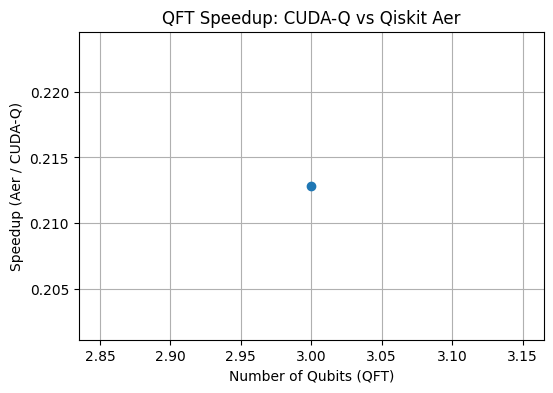

In [ ]:
import os
import numpy as np
from time import time
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from qgear.toolbox.Util_CudaQ import qiskit_to_gateList
from qgear.runner import run_cudaq
from qgear.toolbox.Util_H5io4 import write4_data_hdf5, read4_data_hdf5
from qiskit.quantum_info import Statevector
from qiskit_aer import StatevectorSimulator

def benchmark_qft(n_qubits=5, numShots=1000, backend_cudaq="nvidia", verb=0):
    """
    Compare CUDA-Q vs Qiskit Aer for QFT circuit.
    """
    # ----------------------------
    # 1. Create QFT circuit
    qc = QFT(num_qubits=n_qubits, do_swaps=False).decompose()
    sv_qiskit = Statevector(qc)
    qc.measure_all()
    qcEL = [qc]
    print("\n--- Qiskit Circuit ---")
    print(qc.draw("text"))
    
    # ----------------------------
    # 2. CUDA-Q path
    out_path = "out"
    os.makedirs(out_path, exist_ok=True)
    circ_name = f"qft_{n_qubits}q"

    gateD, md = qiskit_to_gateList(qcEL)
   
    # dont save for now
    inpF = os.path.join(out_path, circ_name + ".gate_list.h5")
    md["short_name"] = circ_name
    write4_data_hdf5(gateD, inpF, md)

    gateD, MD = read4_data_hdf5(inpF, verb)
    T0 = time()
    resL_cudaq,stateL = run_cudaq(gateD, numShots, verb=verb, backend=backend_cudaq)
    sv_cudaq = stateL[0]
    # Fidelity check

    # print(resL_cudaq[0])
    ela_cudaq = time() - T0

    # ----------------------------
    # 3. Qiskit Aer path
    aer_backend = AerSimulator()
    qcT = transpile(qc, aer_backend)

    T1 = time()
    job = aer_backend.run(qcT, shots=numShots)
    res_aer = job.result().get_counts()
    print(sv_qiskit)
    print(np.array(sv_cudaq))
    fidelity = abs(np.vdot(sv_qiskit, np.array(sv_cudaq)))**2
    print("Statevector fidelity:", fidelity)
    # print(res_aer)
    ela_aer = time() - T1

    # ----------------------------
    # 4. Report
    print(f"\n=== QFT {n_qubits} qubits ===")
    print(f"CUDA-Q ({backend_cudaq}): {ela_cudaq:.4f} s")
    print(f"AerSimulator: {ela_aer:.4f} s")
    speedup = ela_aer / ela_cudaq if ela_cudaq > 0 else float('inf')
    print(f"Speedup (Aer / CUDA-Q): {speedup:.2f}x" if speedup > 1 else f"CUDA-Q slower by {1/speedup:.2f}x")

    return ela_cudaq, ela_aer

# ----------------------------
# Run benchmarks for increasing QFT sizes
results = []
for nq in [3, 5, 7, 28]:
    results.append((nq, *benchmark_qft(n_qubits=nq, numShots=2000, backend_cudaq="nvidia", verb=2)))

# ----------------------------
# Optional: Plot speedup
import matplotlib.pyplot as plt

nq_list = [r[0] for r in results]
cudaq_times = [r[1] for r in results]
aer_times = [r[2] for r in results]
speedups = [a/b for a, b in zip(aer_times, cudaq_times)]

plt.figure(figsize=(6,4))
plt.plot(nq_list, speedups, marker='o')
plt.xlabel("Number of Qubits (QFT)")
plt.ylabel("Speedup (Aer / CUDA-Q)")
plt.title("QFT Speedup: CUDA-Q vs Qiskit Aer")
plt.grid(True)
plt.show()

In [20]:
from qgear.toolbox.Util_CudaQ import qft_kernel
import random
import cudaq
import numpy as np
num_qubit = 3
# input_state = [random.choice([0, 1]) for _ in range(num_qubit)]
input_state = [0, 0, 0]  # Example input state
print(cudaq.draw(qft_kernel, input_state))
state = cudaq.get_state(qft_kernel, input_state)
print(np.array(state))

     ╭───╮╭───────────╮╭────────────╮                       
q0 : ┤ h ├┤ r1(1.571) ├┤ r1(0.7854) ├───────────────────────
     ╰───╯╰─────┬─────╯╰─────┬──────╯╭───╮╭───────────╮     
q1 : ───────────●────────────┼───────┤ h ├┤ r1(1.571) ├─────
                             │       ╰───╯╰─────┬─────╯╭───╮
q2 : ────────────────────────●──────────────────●──────┤ h ├
                                                       ╰───╯

[0.35355338+0.j 0.35355338+0.j 0.35355338+0.j 0.35355338+0.j
 0.35355338+0.j 0.35355338+0.j 0.35355338+0.j 0.35355338+0.j]


In [21]:
@cudaq.kernel
def circ_kernel(num_qubit: int, num_gate: int, gate_type: list[int], angles: list[float]):
    qvector = cudaq.qvector(num_qubit)
    
    for i in range(num_gate):
        j = 3 * i
        gateId=gate_type[j]
        q0 = qvector[gate_type[j+1]]
        
        if gateId == 1:
            h(q0)
        elif gateId == 2:
            ry(angles[i], q0)
        elif gateId == 3:
            rz(angles[i], q0)
        elif gateId == 4:
            q1 = qvector[gate_type[j + 2]]
            x.ctrl(q0, q1)
        elif gateId == 5:
            #martin_add_measurement
            continue
        elif gateId == 6:  # controlled phase
            cr1(angles[i], [qvector[gate_type[j + 2]]], q0)
        elif gateId == 7:  # swap
            swap(q0, qvector[gate_type[j + 2]])

In [ ]:
import cudaq
import numpy as np

# Define the QFT parameters for three qubits
num_qubits=3
num_gates=6
gate_type=[1, 2, 0, 6, 2, 1, 1, 1, 0, 6, 2, 0, 6, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
gate_type=[1, 0, 0, 6, 0, 1, 6, 0, 2, 1, 1, 0, 6, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
gate_param=[0.0, 1.5707963705062866, 0.7853981852531433, 0.0, 1.5707963705062866, 0.0, 0.0, 0.0, 0.0, 0.0]

# Call the kernel to retrieve the state
print(cudaq.draw(circ_kernel, num_qubits, num_gates, gate_type, gate_param))
state = cudaq.get_state(circ_kernel, num_qubits, num_gates, gate_type, gate_param)
res=cudaq.sample(circ_kernel, num_qubits, num_gates, gate_type, gate_param)
# Print the resulting state
print(np.array(state))
print(res)

     ╭───╮╭───────────╮╭────────────╮                       
q0 : ┤ h ├┤ r1(1.571) ├┤ r1(0.7854) ├───────────────────────
     ╰───╯╰─────┬─────╯╰─────┬──────╯╭───╮╭───────────╮     
q1 : ───────────●────────────┼───────┤ h ├┤ r1(1.571) ├─────
                             │       ╰───╯╰─────┬─────╯╭───╮
q2 : ────────────────────────●──────────────────●──────┤ h ├
                                                       ╰───╯

[0.35355338+0.j 0.35355338+0.j 0.35355338+0.j 0.35355338+0.j
 0.35355338+0.j 0.35355338+0.j 0.35355338+0.j 0.35355338+0.j]
{ 000:131 001:116 010:117 011:121 100:132 101:114 110:138 111:131 }

